# FinanceMax needs to detect fraudulent transactions in real-time. How can they use machine learning to build an effective fraud detection system?

## Goal:
- The goal of the project is to develop and deploy a machine learning-based fraud detection system for FinanceMax that can accurately and efficiently identify fraudulent transactions in real-time, thereby minimizing financial losses and maintaining the integrity of the financial ecosystem. The system should leverage advanced algorithms and data analysis techniques to continuously monitor incoming transactions, flag suspicious activities, and take appropriate actions to mitigate risks, such as blocking transactions or alerting the relevant authorities for further investigation.

## Libraries

In [1]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVCimport pandas as pd
from sklearn.metrics import accuracy_score, classification_report

## Data

In [2]:
df = pd.read_csv("transactiondata.csv")

In [3]:
df.head()

,TransactionID,Amount,Timestamp,TransactionLocation,IsFraud
0,8036,2763.365182,57:31.1,Chicago,1
1,2443,762.139911,57:31.1,Chennai,0
2,3227,242.295305,57:31.1,Chennai,0
3,2843,918.508006,57:31.1,Chennai,0
4,2237,892.410196,57:31.1,Mumbai,0


## Pre Processing

In [4]:
# Display basic statistics
print(df.describe())

       TransactionID       Amount      IsFraud
count    8200.000000  8200.000000  8200.000000
mean     4100.500000   546.415848     0.024390
std      2367.280437   480.744322     0.154267
min         1.000000     1.011623     0.000000
25%      2050.750000   249.438239     0.000000
50%      4100.500000   503.990179     0.000000
75%      6150.250000   761.233571     0.000000
max      8200.000000  4978.482686     1.000000


## EDA

## Feature Analysis

##### TransactionID:
- Unique identifier for each transaction.
##### Amount:
- The monetary value of the transaction.
##### Timestamp:
- The time at which the transaction occurred.
##### TransactionLocation:
- The location where the transaction took place.
##### IsFraud:
- A binary indicator (0 or 1) denoting whether the transaction is fraudulent or not.


### Distribution of legitimate and fraudulent transactions

Text(0.5, 1.0, 'Distribution of Legitimate and Fraudulent Transactions')

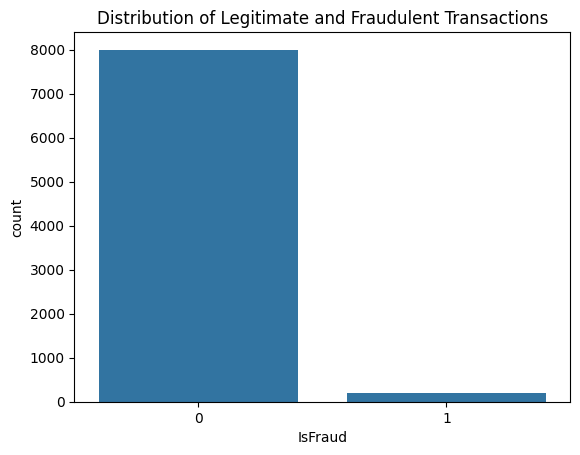

In [5]:
sns.countplot(x='IsFraud', data=df)
plt.title('Distribution of Legitimate and Fraudulent Transactions')

### Distribution of transaction amounts

Text(0, 0.5, 'Frequency')

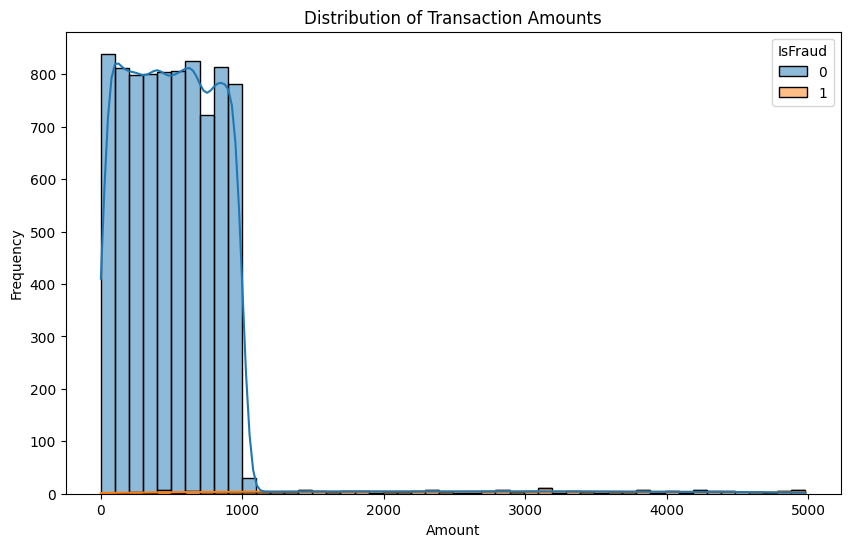

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Amount', bins=50, kde=True, hue='IsFraud', multiple='stack')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')

### Transaction locations for legitimate and fraudulent transactions

Text(0.5, 1.0, 'Transaction Locations for Legitimate and Fraudulent Transactions')

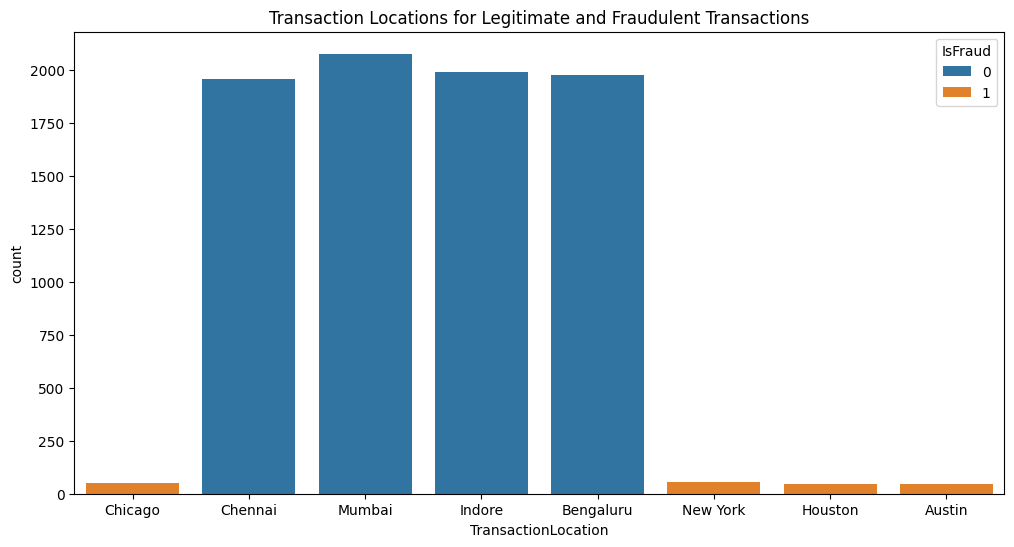

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(x='TransactionLocation', hue='IsFraud', data=df)
plt.title('Transaction Locations for Legitimate and Fraudulent Transactions')

## Modal Comparission

In [8]:
# Load the dataset
df = pd.read_csv("transactiondata.csv")

# Preprocessing
# Drop unnecessary columns
df = df.drop('TransactionID', axis=1)

# Split the 'Timestamp' column into minutes and seconds
df[['Minutes', 'Seconds']] = df['Timestamp'].str.split(':', expand=True)

# Convert minutes and seconds to float
df['Minutes'] = df['Minutes'].astype(float)
df['Seconds'] = df['Seconds'].astype(float)

# Convert the time to seconds
df['Timestamp_seconds'] = df['Minutes'] * 60 + df['Seconds']

# Drop the original 'Timestamp' column and the intermediate columns
df = df.drop(['Timestamp', 'Minutes', 'Seconds'], axis=1)

# Now 'Timestamp_seconds' column contains the time in seconds

# Continue with the rest of the preprocessing steps and model training


# Encode categorical variables
label_encoder = LabelEncoder()
df['TransactionLocation'] = label_encoder.fit_transform(df['TransactionLocation'])

# Splitting the data into features (X) and target variable (y)
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
logistic_regression = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svm_classifier = SVC(random_state=42)

# Train the models
logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_lr = logistic_regression.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the models
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nSupport Vector Machine:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      0.79      0.88        33

    accuracy                           1.00      1640
   macro avg       1.00      0.89      0.94      1640
weighted avg       1.00      1.00      1.00      1640

Accuracy: 0.9957317073170732

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00        33

    accuracy                           1.00      1640
   macro avg       1.00      1.00      1.00      1640
weighted avg       1.00      1.00      1.00      1640

Accuracy: 1.0

Support Vector Machine:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      0.76      0.86        33

    accuracy                           1.00      1640
   macro avg       1.00

### Final Modal

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv("transactiondata.csv")

# Preprocessing
# Drop unnecessary columns
df = df.drop('TransactionID', axis=1)

# Split the 'Timestamp' column into minutes and seconds
df[['Minutes', 'Seconds']] = df['Timestamp'].str.split(':', expand=True)

# Convert minutes and seconds to float
df['Minutes'] = df['Minutes'].astype(float)
df['Seconds'] = df['Seconds'].astype(float)

# Convert the time to seconds
df['Timestamp_seconds'] = df['Minutes'] * 60 + df['Seconds']

# Drop the original 'Timestamp' column and the intermediate columns
df = df.drop(['Timestamp', 'Minutes', 'Seconds'], axis=1)

# Encode categorical variables using one-hot encoding
encoder = OneHotEncoder()
df_encoded = pd.DataFrame(encoder.fit_transform(df[['TransactionLocation']]).toarray(), columns=encoder.categories_[0])

# Concatenate the encoded features with the original dataframe
df = pd.concat([df.drop(['TransactionLocation'], axis=1), df_encoded], axis=1)

# Splitting the data into features (X) and target variable (y)
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier
random_forest.fit(X_train, y_train)

# Make predictions
y_pred = random_forest.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00        33

    accuracy                           1.00      1640
   macro avg       1.00      1.00      1.00      1640
weighted avg       1.00      1.00      1.00      1640

Accuracy: 1.0


### Final Modal With User Given Input 

In [6]:
# Assuming the features for the user are provided in a dictionary
user_features = {
    'Amount': 918.5080057,
    'TransactionLocation': 'Chennai'  # Assuming the user's transaction location is Chicago
}

# Create a DataFrame with the user features
user_df = pd.DataFrame(user_features, index=[0])

# Preprocess the user data similar to the training data
# Split the 'Timestamp' column into minutes and seconds
user_df[['Minutes', 'Seconds']] = '57:31.1'.split(':')
# Convert minutes and seconds to float
user_df['Minutes'] = user_df['Minutes'].astype(float)
user_df['Seconds'] = user_df['Seconds'].astype(float)
# Convert the time to seconds
user_df['Timestamp_seconds'] = user_df['Minutes'] * 60 + user_df['Seconds']
# Drop the original 'Timestamp' column and the intermediate columns
user_df = user_df.drop(['Minutes', 'Seconds'], axis=1)

# Encode categorical variables using the same OneHotEncoder
user_encoded = pd.DataFrame(encoder.transform(user_df[['TransactionLocation']]).toarray(), columns=encoder.categories_[0])
# Concatenate the encoded features with the original dataframe
user_df = pd.concat([user_df.drop(['TransactionLocation'], axis=1), user_encoded], axis=1)

# Make predictions for the user
user_prediction = random_forest.predict(user_df)

# Print the prediction
if user_prediction[0] == 1:
    print("The transaction is predicted to be fraudulent.")
else:
    print("The transaction is predicted to be legitimate.")


The transaction is predicted to be legitimate.


In [7]:
import pandas as pd
user_features = {
    'Amount': float(input("Enter the transaction amount: ")),
    'TransactionLocation': input("Enter the transaction location: ")  # Assuming the user's transaction location is Chicago
}

# Create a DataFrame with the user features
user_df = pd.DataFrame(user_features, index=[0])

# Preprocess the user data similar to the training data
# Split the 'Timestamp' column into minutes and seconds
user_df[['Minutes', 'Seconds']] = input("Enter the timestamp (MM:SS.S): ").split(':')
# Convert minutes and seconds to float
user_df['Minutes'] = user_df['Minutes'].astype(float)
user_df['Seconds'] = user_df['Seconds'].astype(float)
# Convert the time to seconds
user_df['Timestamp_seconds'] = user_df['Minutes'] * 60 + user_df['Seconds']
# Drop the original 'Timestamp' column and the intermediate columns
user_df = user_df.drop(['Minutes', 'Seconds'], axis=1)

# Encode categorical variables using the same OneHotEncoder
user_encoded = pd.DataFrame(encoder.transform(user_df[['TransactionLocation']]).toarray(), columns=encoder.categories_[0])
# Concatenate the encoded features with the original dataframe
user_df = pd.concat([user_df.drop(['TransactionLocation'], axis=1), user_encoded], axis=1)

# Make predictions for the user
user_prediction = random_forest.predict(user_df)

# Print the prediction
if user_prediction[0] == 1:
    print("The transaction is predicted to be fraudulent.")
else:
    print("The transaction is predicted to be legitimate.")


The transaction is predicted to be fraudulent.
